# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from thesis_graph.data import load_thesis_csv, load_researchers_csv, filter_thesis_df

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

%load_ext autoreload
%autoreload 2

## Load data

In [2]:
thesis_df = load_thesis_csv()
thesis_df.head()

,thesis_title_mk,student,mentor,c1,c2,application_date,thesis_status,thesis_desc_mk,thesis_desc_en,thesis_title_en
0,Систем за ред на чекање,14083 - Мартина Ѓорѓиевска,Магдалена Костоска,Марјан Гушев,Гоце Арменски,2015-04-02,Одбрана,Изработка на систем за евиденција и администри...,Making a system of records and administration ...,A queue system
1,АНТ+ протокол,12482 - Давор Алексовски,Дејан Спасов,Сашко Ристов,Марјан Гушев,2015-04-03,Одбрана,АНТ е безжичен протокол кој овозможува проток ...,Ant is a wireless protocol that allows the flo...,Oath + protocol
2,Вградлив систем за одредување на изминат пат с...,37110 - Александар Рајковски,Владимир Трајковиќ,Билјана Стојкоска,Владимир Здравески,2015-04-08,Одбрана,Во оваа дипломска работа ќе биде истражена мож...,This degree work will explore the possibility ...,Built -in system for determining the passing p...
3,"Анализа, дизајн и имплементација на ИС за резе...",4510 - Александра Стојчева,Слободан Калајџиски,Кире Триводалиев,Билјана Стојкоска,2015-04-16,Одбрана,Во дипломската работа ќе биде разработен инфор...,The diplomatic work will be developed an infor...,"Analyzing, Design and Implementation of IS for..."
4,Разработка на PHP рамката Laravel 5,115064 - Милан Стојановски,Иван Чорбев,Ивица Димитровски,Ѓорѓи Маџаров,2015-04-29,Одбрана,Во дипломската работа ќе биде проучена новата ...,The new version of PHP Framework Laravel 5 wil...,PHP Frame Development Laravel 5


## Data quality and completeness

### Missing values

In [3]:
thesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   thesis_title_mk   3266 non-null   object        
 1   student           3266 non-null   object        
 2   mentor            3266 non-null   object        
 3   c1                3266 non-null   object        
 4   c2                3266 non-null   object        
 5   application_date  3266 non-null   datetime64[ns]
 6   thesis_status     3266 non-null   object        
 7   thesis_desc_mk    3266 non-null   object        
 8   thesis_desc_en    3266 non-null   object        
 9   thesis_title_en   3266 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 255.3+ KB


**Conclusion**: The dataset is complete with no missing values.

## Thesis
### Thesis status

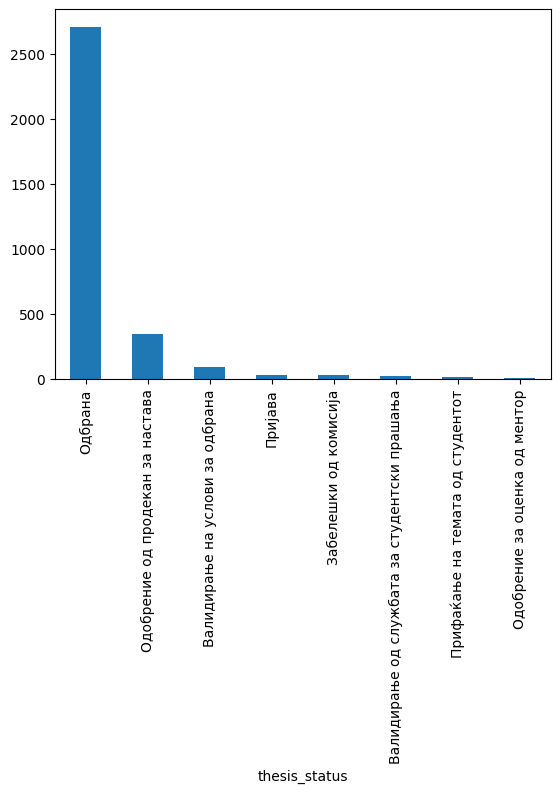

In [4]:
thesis_df["thesis_status"].value_counts().plot.bar()
plt.show()

## Thesis per student

In [5]:
thesis_counts = thesis_df["student"].value_counts()

thesis_counts.max()

# Some students have multiple theses

np.int64(3)

In [6]:
# Filtered thesis
filtered_thesis_df = filter_thesis_df(thesis_df)
filtered_thesis_df["student"].value_counts().max()

# After filtering, each student has only one thesis

np.int64(1)

### Thesis title

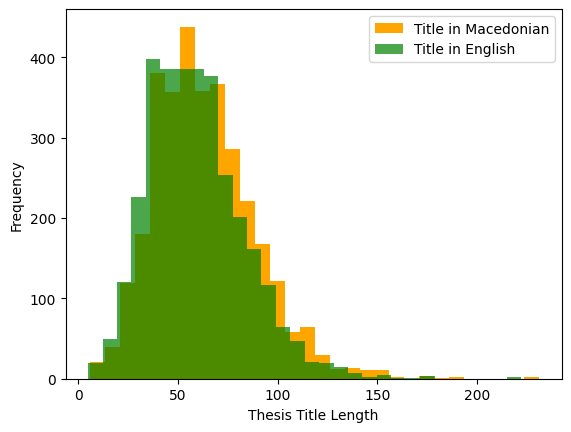

In [7]:
thesis_df["thesis_title_mk"].str.len().plot.hist(bins=30, color="orange")
thesis_df["thesis_title_en"].str.len().plot.hist(
    bins=30, color="green", xlabel="Thesis Title Length", alpha=0.7
)
plt.legend(["Title in Macedonian", "Title in English"])
plt.show()

### Thesis abstract

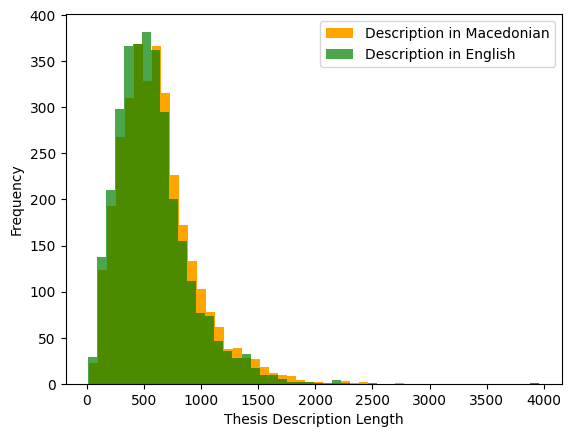

In [8]:
thesis_df["thesis_desc_mk"].str.len().plot.hist(bins=50, color="orange")
thesis_df["thesis_desc_en"].str.len().plot.hist(
    bins=50, color="green", xlabel="Thesis Description Length", alpha=0.7
)
plt.legend(["Description in Macedonian", "Description in English"])
plt.show()

## Mentor

### Workload distribution

In [9]:
mentor_counts = thesis_df["mentor"].value_counts().to_frame()
display(mentor_counts.head(10))
display(mentor_counts.tail(10))
display(mentor_counts.describe())

,count
mentor,
Смилка Јанеска Саркањац,402
Иван Чорбев,278
Димитар Трајанов,253
Иван Китановски,194
Ристе Стојанов,167
Магдалена Костоска,151
Петре Ламески,127
Георгина Мирчева,122
Билјана Стојкоска,88


,count
mentor,
Сузана Лошковска,10
Ласко Баснарков,8
Александар Стојменски,8
Методија Јанчески,5
Вангел Ајановски,5
Верица Бакева Смиљкова,4
Марија Михова,4
Илинка Иваноска,4
Александра Поповска Митровиќ,2


,count
count,57.000000
mean,57.298246
std,75.137722
min,2.000000
25%,13.000000
50%,30.000000
75%,70.000000
max,402.000000


### Fields of interest

In [10]:
researchers_df = load_researchers_csv("data/researchers.csv")
researchers_df.head()

,name,interests,articles
0,Костадин Мишев,"[data science, natural language processing, sp...",[Evaluation of Sentiment Analysis in Finance: ...
1,Петре Ламески,"[data science, software engineering, applied ai]",[Improving activity recognition accuracy in am...
2,Игор Мишковски,"[network science, statistical physics, data mi...","[Vulnerability of complex networks, Mobile pho..."
3,Дејан Спасов,"[computations, communications]",[Decoding of lte turbo codes initialized with ...
4,Смилка Јанеска Саркањац,[strategic management of information technolog...,[Analysis of introducing one stop shop adminis...


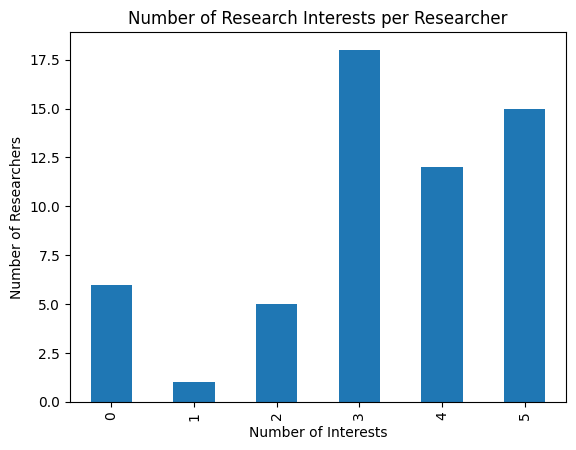

In [11]:
researchers_df["interests"].str.len().value_counts().sort_index().plot.bar(
    title="Number of Research Interests per Researcher",
    xlabel="Number of Interests",
    ylabel="Number of Researchers",
)
plt.show()

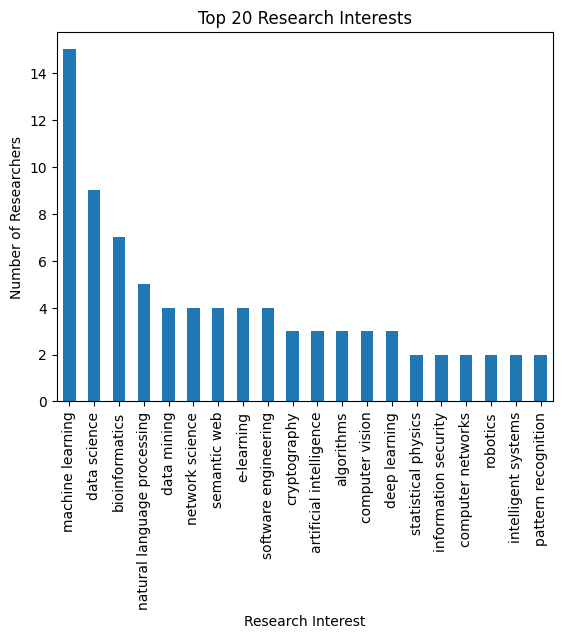

In [12]:
researchers_df["interests"].explode().value_counts().head(20).plot.bar(
    title="Top 20 Research Interests",
    xlabel="Research Interest",
    ylabel="Number of Researchers",
)
plt.show()

## Commision members

In [13]:
commision_count = (
    pd.concat([thesis_df["c1"], thesis_df["c2"]]).value_counts().to_frame()
)
commision_count.head()

,count
Ристе Стојанов,329
Александар Тенев,294
Георгина Мирчева,254
Костадин Мишев,242
Владимир Здравески,223


### Workload distribution

In [14]:
display(commision_count.head(10))
display(commision_count.tail(10))
display(commision_count.describe())

,count
Ристе Стојанов,329
Александар Тенев,294
Георгина Мирчева,254
Костадин Мишев,242
Владимир Здравески,223
Смилка Јанеска Саркањац,221
Иван Китановски,220
Сашо Граматиков,218
Иван Чорбев,205
Ивица Димитровски,174


,count
Благоја Марковски,1
Ѓорѓи Ќосев - 3P Development,1
Филип Блажевски,1
Јозеф Шпилнер,1
Александа Лозаноска,1
Милка Љончева,1
Катерина Русевска,1
Марија Танеска,1
Евгенија Крајчевска,1
Мартин Динев,1


,count
count,114.000000
mean,57.298246
std,72.201651
min,1.000000
25%,5.000000
50%,24.500000
75%,88.000000
max,329.000000


## Mentor - Commission member pairs

In [15]:
mentor_commission_pairs = pd.melt(
    thesis_df,
    id_vars=["mentor"],
    value_vars=["c1", "c2"],
    value_name="commission_member",
)

mentor_commission_counts = (
    mentor_commission_pairs.groupby(["mentor", "commission_member"])
    .agg(count=("commission_member", "count"))
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x.sort_values(ascending=False, by="count"))
)

mentor_totals = (
    mentor_commission_counts.groupby(level=0)
    .agg(sum=("count", "sum"))
    .sort_values(ascending=False, by="sum")
)
mentor_commission_counts = mentor_commission_counts.reindex(
    mentor_totals.index, level=0
)

mentor_commission_counts = mentor_commission_counts.reset_index()

display(mentor_commission_counts.head(10))
display(mentor_commission_counts.tail(10))

,mentor,commission_member,count
0,Смилка Јанеска Саркањац,Александар Тенев,227
1,Смилка Јанеска Саркањац,Георгина Мирчева,170
2,Смилка Јанеска Саркањац,Владимир Здравески,155
3,Смилка Јанеска Саркањац,Весна Димитриевска Ристовска,67
4,Смилка Јанеска Саркањац,Ристе Стојанов,60
5,Смилка Јанеска Саркањац,Билјана Стојкоска,53
6,Смилка Јанеска Саркањац,Дејан Спасов,23
7,Смилка Јанеска Саркањац,Ана Мадевска Богданова,7
8,Смилка Јанеска Саркањац,Ефтим Здравевски,6
9,Смилка Јанеска Саркањац,Катерина Здравкова,5


,mentor,commission_member,count
1111,Илинка Иваноска,Билјана Тојтовска,1
1112,Илинка Иваноска,Александра Дединец,1
1113,Илинка Иваноска,Кире Триводалиев,1
1114,Илинка Иваноска,Слободан Калајџиски,1
1115,Билјана Тојтовска,Бојан Илијоски,2
1116,Билјана Тојтовска,Илинка Иваноска,1
1117,Билјана Тојтовска,Катарина Тројачанец,1
1118,Александра Поповска Митровиќ,Верица Бакева Смиљкова,2
1119,Александра Поповска Митровиќ,Весна Димитрова,1
1120,Александра Поповска Митровиќ,Моника Симјаноска,1


### Mentor commission diversity

In [16]:
commission_diversity = (
    mentor_commission_counts.groupby("mentor")
    .agg(commission_diversity=("commission_member", "count"))
    .sort_values(ascending=False, by="commission_diversity")
)

display(commission_diversity.head(10))
display(commission_diversity.tail(10))
display(commission_diversity.describe())

,commission_diversity
mentor,
Иван Чорбев,53
Петре Ламески,52
Магдалена Костоска,49
Владимир Трајковиќ,46
Катерина Здравкова,40
Игор Мишковски,38
Билјана Стојкоска,37
Ристе Стојанов,36
Иван Китановски,35


,commission_diversity
mentor,
Александар Стојменски,7
Ласко Баснарков,7
Методија Јанчески,7
Марија Михова,7
Мирослав Мирчев,7
Гоце Арменски,6
Илинка Иваноска,6
Билјана Тојтовска,3
Александра Поповска Митровиќ,3


,commission_diversity
count,57.000000
mean,19.666667
std,12.548952
min,3.000000
25%,10.000000
50%,18.000000
75%,24.000000
max,53.000000
